<a href="https://colab.research.google.com/github/TarDeb/TF/blob/main/ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: mount colab

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
train_path = '/content/drive/MyDrive/Vision Transforms/data/train'
valid_path = '/content/drive/MyDrive/Vision Transforms/data/val'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32  # You can adjust this based on your available memory and requirements
img_height = 60
img_width = 41

train_ds = image_dataset_from_directory(
    directory=train_path,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    directory=valid_path,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 438 files belonging to 5 classes.
Found 159 files belonging to 5 classes.


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [9]:
!pip install --upgrade tensorflow tensorflow-hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Succes

**First model**

In [6]:
import tensorflow_hub as hub

vit_model_url = "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1"

# Resize the images in the model
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

base_model = hub.KerasLayer(vit_model_url, trainable=True)

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [7]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


14/14 [==============================] - 120s 5s/step - loss: 2.4756 - accuracy: 0.3128 - val_loss: 1.2826 - val_accuracy: 0.5535
Epoch 2/10
14/14 [==============================] - 9s 602ms/step - loss: 1.5262 - accuracy: 0.4749 - val_loss: 0.9732 - val_accuracy: 0.6792
Epoch 3/10
14/14 [==============================] - 9s 622ms/step - loss: 1.2636 - accuracy: 0.6027 - val_loss: 0.8428 - val_accuracy: 0.7358
Epoch 4/10
14/14 [==============================] - 9s 625ms/step - loss: 1.0927 - accuracy: 0.6164 - val_loss: 0.7805 - val_accuracy: 0.7296
Epoch 5/10
14/14 [==============================] - 9s 606ms/step - loss: 0.9692 - accuracy: 0.6667 - val_loss: 0.7434 - val_accuracy: 0.7484
Epoch 6/10
14/14 [==============================] - 9s 593ms/step - loss: 0.8453 - accuracy: 0.6963 - val_loss: 0.6222 - val_accuracy: 0.7862
Epoch 7/10
14/14 [==============================] - 9s 574ms/step - loss: 0.7653 - accuracy: 0.7215 - val_loss: 0.5823 - val_accuracy: 0.8050
Epoch 8/10
14/14 [

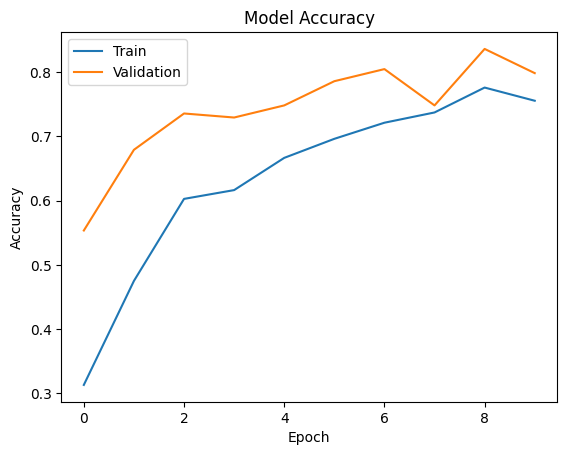

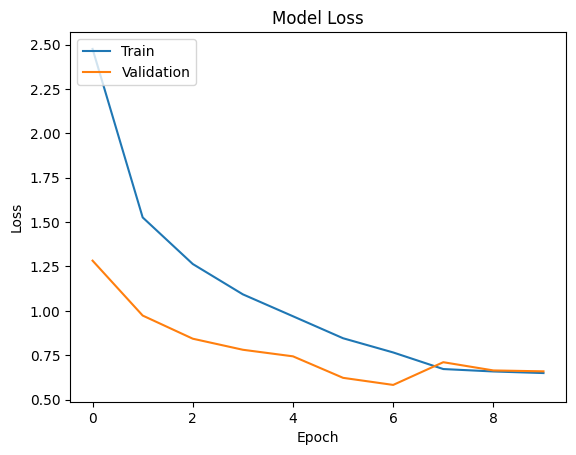

In [8]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
model.save('path_to_my_model.h5')  # Saves the model for future use


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ValueError: Unable to synchronously create dataset (name already exists)

https://www.kaggle.com/models/spsayakpaul/vision-transformer/tensorFlow2/vit-b32-classification

**Second Model**

In [12]:
import tensorflow_hub as hub

vit_model_url = "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1"

# Resize the images in the model
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

base_model = hub.KerasLayer(vit_model_url, trainable=True)

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [13]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


14/14 [==============================] - 15s 709ms/step - loss: 2.7207 - accuracy: 0.3037 - val_loss: 1.4291 - val_accuracy: 0.4088
Epoch 2/10
14/14 [==============================] - 3s 163ms/step - loss: 1.7764 - accuracy: 0.4863 - val_loss: 1.1084 - val_accuracy: 0.5849
Epoch 3/10
14/14 [==============================] - 3s 166ms/step - loss: 1.2250 - accuracy: 0.6187 - val_loss: 0.8484 - val_accuracy: 0.7107
Epoch 4/10
14/14 [==============================] - 3s 165ms/step - loss: 1.0790 - accuracy: 0.6598 - val_loss: 0.7535 - val_accuracy: 0.7736
Epoch 5/10
14/14 [==============================] - 3s 169ms/step - loss: 0.9034 - accuracy: 0.7192 - val_loss: 0.6407 - val_accuracy: 0.7987
Epoch 6/10
14/14 [==============================] - 3s 199ms/step - loss: 0.8498 - accuracy: 0.7078 - val_loss: 0.6203 - val_accuracy: 0.7987
Epoch 7/10
14/14 [==============================] - 3s 169ms/step - loss: 0.7092 - accuracy: 0.7740 - val_loss: 0.5975 - val_accuracy: 0.8302
Epoch 8/10
14/14